얼굴의 좌표 = 934 903 1272 1272


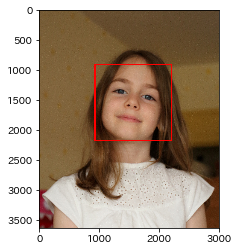

In [8]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기 --- (*2)
img = cv2.imread("girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 결과 확인하기 --- (*4)
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기 --- (*5)
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



얼굴의 좌표 = 934 903 1272 1272


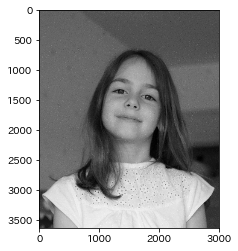

In [14]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기 --- (*2)
img = cv2.imread("girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 결과 확인하기 --- (*4)
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기 --- (*5)
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    #cv2.rectangle(img_gray, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
slice = img_gray[x:x+w, y:y+h]
cv2.imwrite("face-pickup.png", slice)
plt.imshow(img_gray, cmap="gray")
plt.show()



In [15]:
dir(cv2)

['',
 'ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'BORDER_REFLECT',
 'BORDER_REFLECT101',
 'BORDER_REFLECT_101',
 'BORDER_REPLICATE',
 'BORDER_TRANSPARENT',
 'BORDER_WRAP',
 'BOWImgDescr

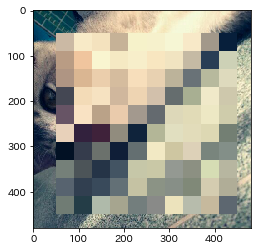

In [2]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 이미지를 읽어 들이고 모자이크 처리하기
img = cv2.imread("cat.jpg")
mos = mosaic(img, (50, 50, 450, 450), 10)

# 이미지 출력하기
cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()



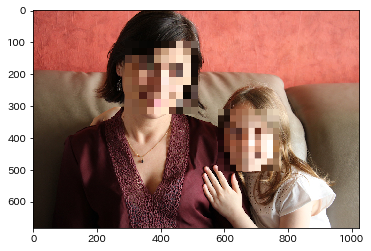

In [7]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기
img = cv2.imread("family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()
# 인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



---0---
얼굴의 좌표 = 318 308 408 408
---10---
얼굴의 좌표 = 393 384 413 413
---20---
얼굴의 좌표 = 452 445 408 408
---30---
얼굴의 좌표 = 497 485 403 403
---40---
---50---
---60---
---70---
---80---


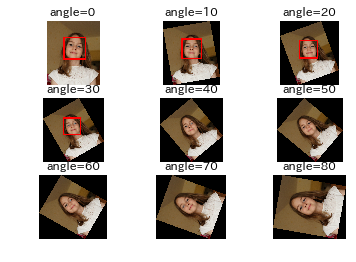

In [21]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 검출기 생성하고 이미지 읽어 들이기
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("girl.jpg")

# 얼굴 검출하고 영역 표시하기
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
    # 인식한 부분 표시하기
    for (x,y,w,h) in face_list:
        print("얼굴의 좌표 =", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=30)

# 여러 각도의 이미지를 만들고 테스트하기
for i in range(0, 9):
    ang = i * 10
    print("---" + str(ang) + "---")
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.title("angle=" + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
plt.show()
